In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/My Drive/kaggle'

In [3]:
%cd /content/drive/My Drive/kaggle

/content/drive/My Drive/kaggle


In [4]:
!kaggle datasets download -d camnugent/california-housing-prices

california-housing-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip \*.zip && rm *.zip

Archive:  california-housing-prices.zip
replace housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: housing.csv             


In [6]:
data = pd.read_csv("/content/drive/MyDrive/kaggle/housing.csv")

In [7]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [11]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
train_data = X_train.join(y_train)

In [14]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7415,-118.22,33.94,42.0,1046.0,287.0,1218.0,289.0,2.6538,<1H OCEAN,143400.0
3799,-118.36,34.16,45.0,1755.0,335.0,822.0,342.0,5.1423,<1H OCEAN,322900.0
6063,-117.83,33.99,14.0,17527.0,2751.0,8380.0,2676.0,6.2734,<1H OCEAN,267000.0
92,-122.28,37.80,52.0,96.0,31.0,191.0,34.0,0.7500,NEAR BAY,162500.0
15273,-117.28,33.06,8.0,4172.0,1022.0,2585.0,941.0,4.0118,NEAR OCEAN,245800.0
...,...,...,...,...,...,...,...,...,...,...
10040,-121.05,39.20,48.0,1759.0,389.0,716.0,350.0,2.3125,INLAND,108300.0
6539,-118.04,34.04,35.0,1734.0,363.0,1527.0,344.0,3.0000,<1H OCEAN,160600.0
6969,-118.05,33.98,41.0,1694.0,413.0,1222.0,387.0,2.8311,<1H OCEAN,155300.0
13853,-117.31,34.50,14.0,2443.0,447.0,883.0,465.0,2.1111,INLAND,116700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

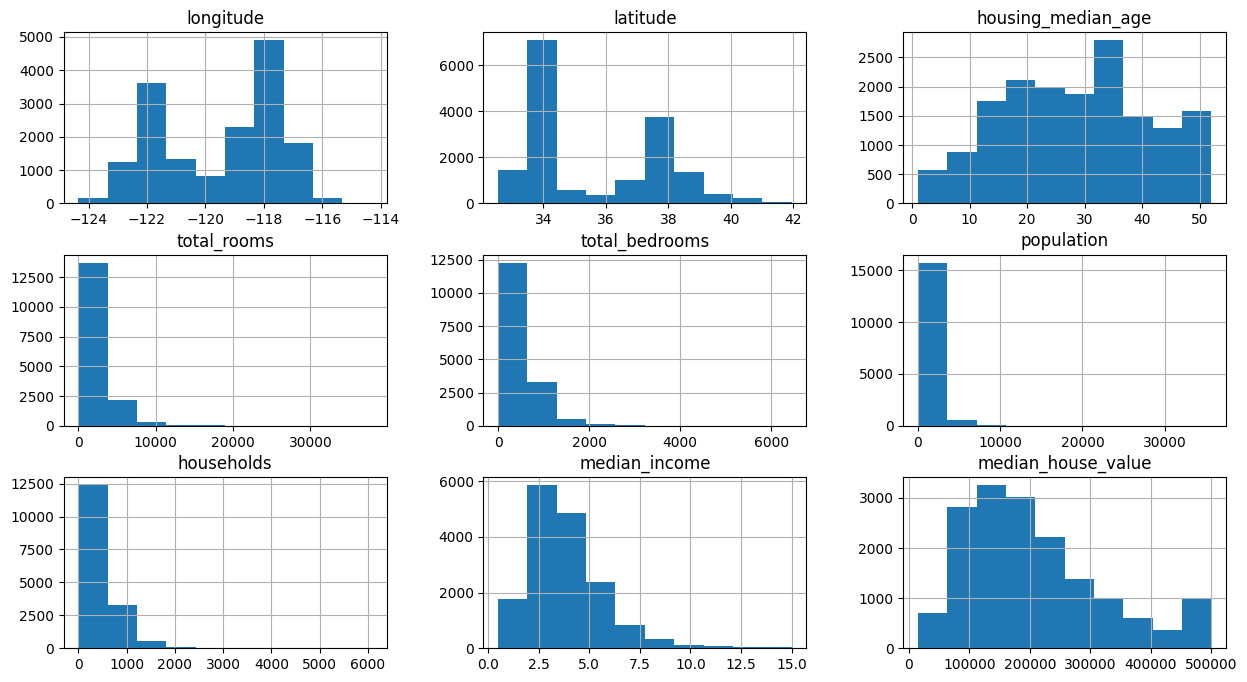

In [15]:
train_data.hist(figsize=(15, 8))

<ipython-input-16-2fd49b6ee71a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap= "YlGnBu" )


<Axes: >

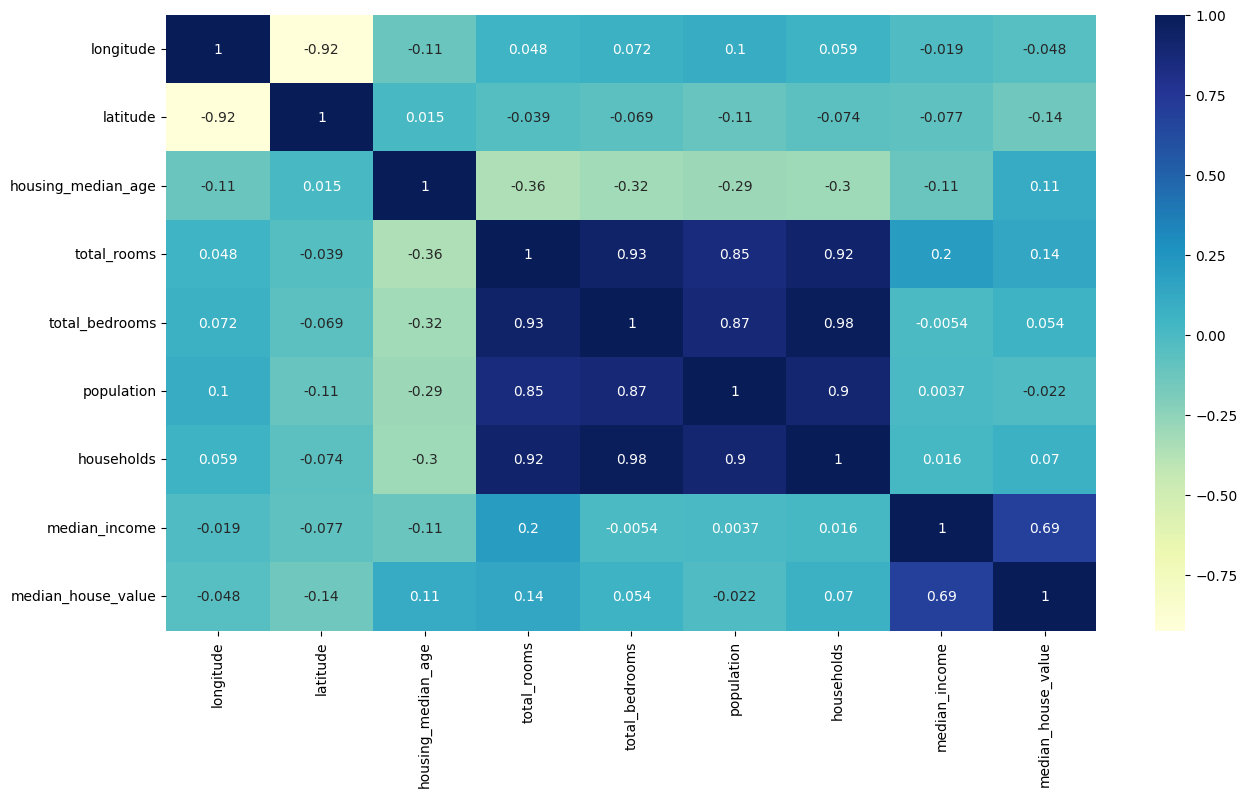

In [16]:
plt.figure(figsize= (15,8) )
sns.heatmap(train_data.corr(), annot=True, cmap= "YlGnBu" )

In [17]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

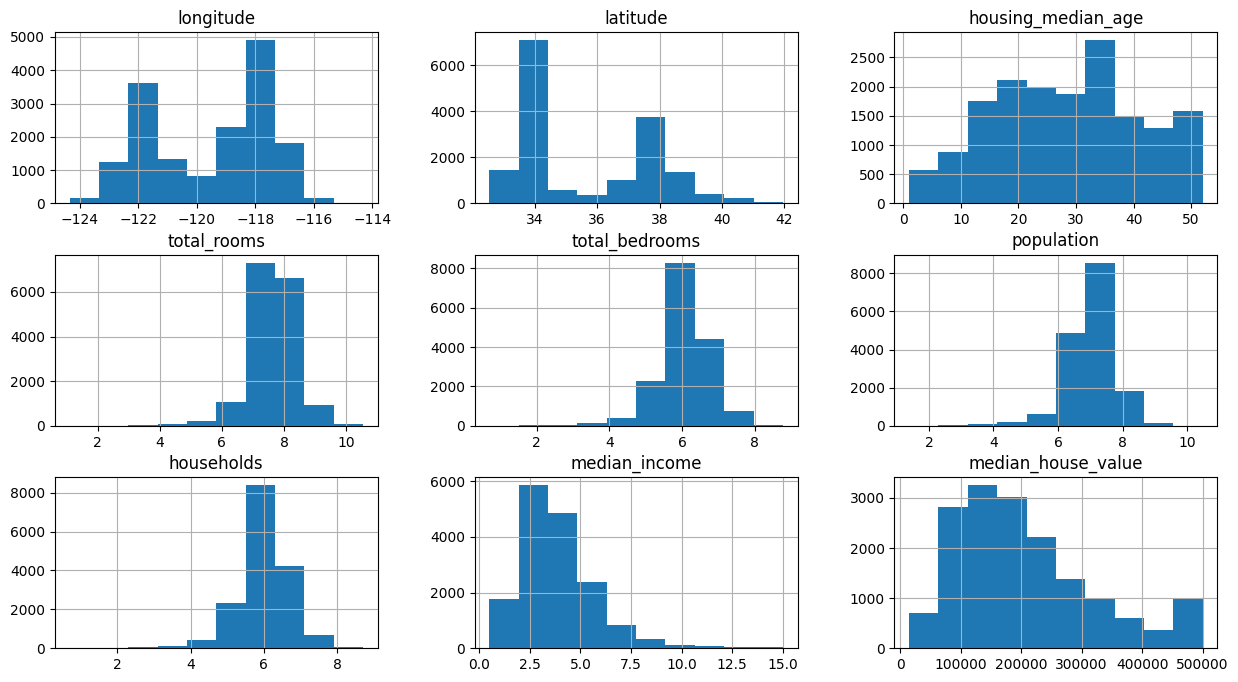

In [19]:
train_data.hist(figsize=(15,8))

In [20]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

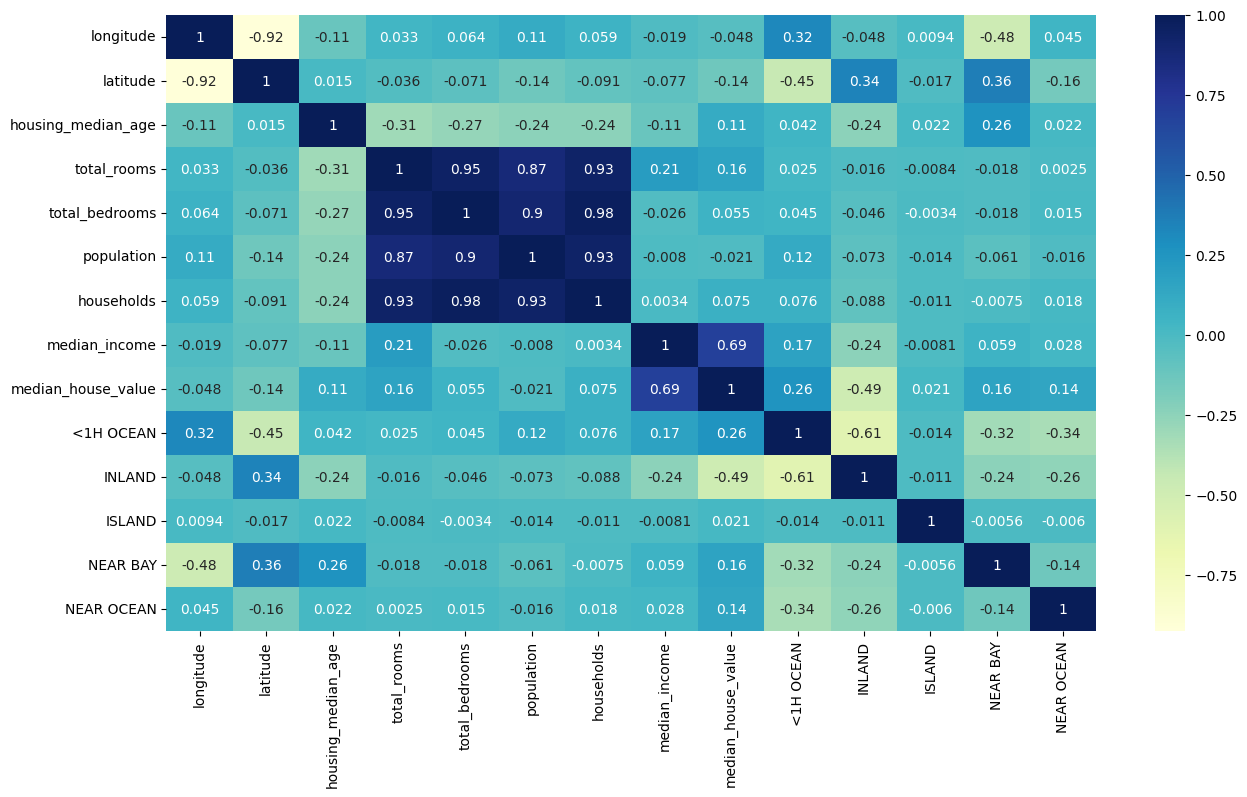

In [21]:
plt.figure(figsize= (15,8) )
sns.heatmap(train_data.corr(), annot=True, cmap= "YlGnBu" )

<Axes: xlabel='latitude', ylabel='longitude'>

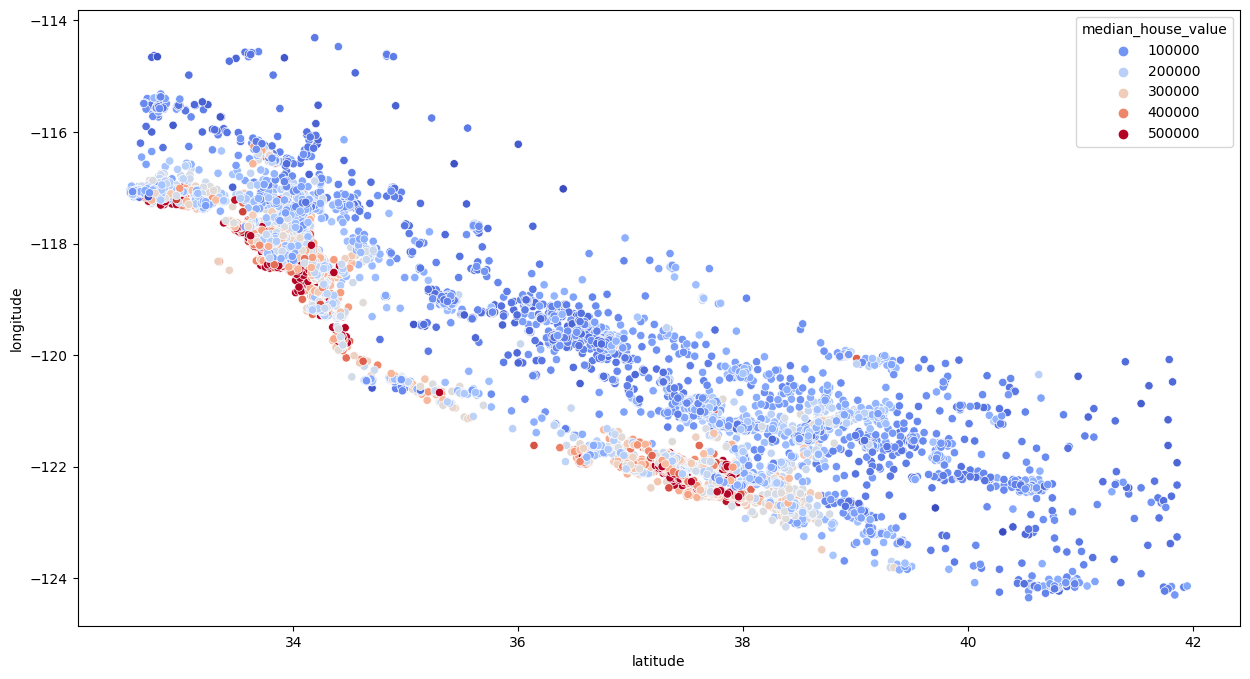

In [22]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [23]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

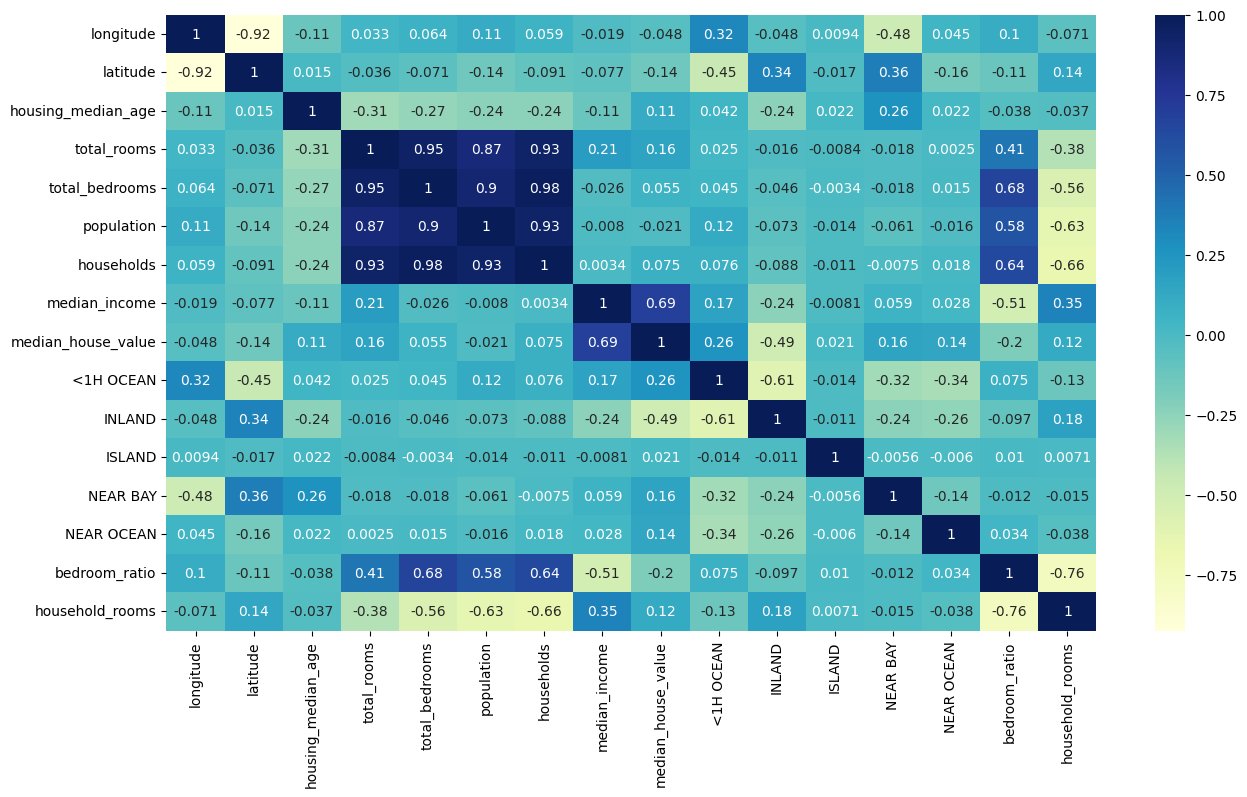

In [24]:
plt.figure(figsize= (15,8) )
sns.heatmap(train_data.corr(), annot=True, cmap= "YlGnBu" )

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [26]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [27]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [28]:
X_test_s = scaler.transform(X_test)

In [29]:
reg.score(X_test_s, y_test)

0.6662930852567805

In [32]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [33]:
forest.score(X_test_s, y_test)

0.8055368164709462

In [37]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [38]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [39]:
grid_search.best_estimator_.score(X_test_s, y_test)

0.8074470465364803